Tarea 1 corregida, realizada en conjunto con Camilo Casanova


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [53]:
data = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv",sep=",")
data2 = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_std.csv",sep=",")
data3 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto13/CasosNuevosCumulativo.csv?raw=true', sep=',')
##leo distintos dataframe de las cuarentenas para seleccionar con cual trabajar

In [54]:
data.head(5)

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13


In [55]:
data2.head(5)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,6.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-30,NaN


In [56]:
data3.head(5)

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,17,13,12,8,10,7,9,25,9,11
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,24,55,27,25,21,22,25,37,20,13
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,36,78,88,68,60,45,39,49,49,49
3,Atacama,0,0,0,0,0,0,0,0,0,...,39,81,61,61,66,56,44,28,53,74
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,95,94,109,93,101,81,53,62,106,68


In [57]:
## finalmente me quede con la data3 ya que me indica el numero de contagiados por dia

In [58]:
data3

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,17,13,12,8,10,7,9,25,9,11
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,24,55,27,25,21,22,25,37,20,13
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,36,78,88,68,60,45,39,49,49,49
3,Atacama,0,0,0,0,0,0,0,0,0,...,39,81,61,61,66,56,44,28,53,74
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,95,94,109,93,101,81,53,62,106,68
5,Valparaíso,0,0,0,0,0,0,0,0,0,...,178,222,233,191,211,165,102,150,176,121
6,Metropolitana,0,1,1,1,1,2,3,1,4,...,420,620,534,583,416,343,263,350,389,340
7,O’Higgins,0,0,0,0,0,0,0,0,0,...,47,61,48,48,48,39,22,23,42,45
8,Maule,0,1,0,0,0,1,1,1,2,...,85,116,98,117,94,87,33,67,107,91
9,Ñuble,0,0,0,0,0,0,0,0,0,...,56,45,93,72,75,49,33,41,50,50


In [59]:
data3 = data3.melt(id_vars=["Region"], var_name = "fecha", value_name = 'valor') 
data3
## modifico la data para obtner una sola columna de valores 

,Region,fecha,valor
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0
...,...,...,...
11011,Los Ríos,2021-12-10,49.0
11012,Los Lagos,2021-12-10,177.0
11013,Aysén,2021-12-10,28.0
11014,Magallanes,2021-12-10,19.0


In [61]:
data3_1 = data3[data3['Region'] == 'Arica y Parinacota']
data3_2 = data3[data3['Region'] == 'Tarapacá']
data3_3 = data3[data3['Region'] == 'Antofagasta']
data3_4 = data3[data3['Region'] == 'Atacama']
data3_5 = data3[data3['Region'] == 'Coquimbo']
data3_6 = data3[data3['Region'] == 'Valparaíso']
data3_7 = data3[data3['Region'] == 'Metropolitana']
data3_8 = data3[data3['Region'] == 'O’Higgins']
data3_9 = data3[data3['Region'] == 'Maule']
data3_10 = data3[data3['Region'] == 'Ñuble']
data3_11 = data3[data3['Region'] == 'Biobío']
data3_12 = data3[data3['Region'] == 'Araucanía']
data3_13 = data3[data3['Region'] == 'Los Ríos']
data3_14 = data3[data3['Region'] == 'Los Lagos']
data3_15 = data3[data3['Region'] == 'Aysén']
data3_16 = data3[data3['Region'] == 'Magallanes']
## distribuyo la data por regiones

In [62]:
data3_1
## compruebo si solo me aparcen los datos de la region seleccionada

,Region,fecha,valor
0,Arica y Parinacota,2020-03-03,0.0
17,Arica y Parinacota,2020-03-04,0.0
34,Arica y Parinacota,2020-03-05,0.0
51,Arica y Parinacota,2020-03-06,0.0
68,Arica y Parinacota,2020-03-07,0.0
...,...,...,...
10931,Arica y Parinacota,2021-12-06,7.0
10948,Arica y Parinacota,2021-12-07,9.0
10965,Arica y Parinacota,2021-12-08,25.0
10982,Arica y Parinacota,2021-12-09,9.0


A continuacion se presentaran los codigos para la grafica de cada region con su maximo respectivo

En la region de Arica y Parinacota, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 180.0 personas 


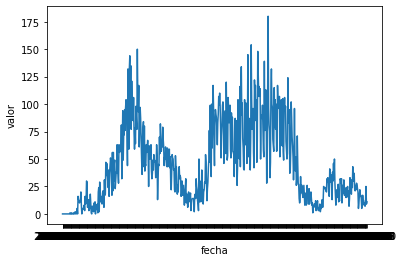

In [69]:
sns.lineplot(x="fecha", y="valor", data = data3_1)
maxs = data3_1["valor"].max()
print("En la region de Arica y Parinacota, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs ,"personas ")

En la region de Tarapacá, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 379.0 personas 


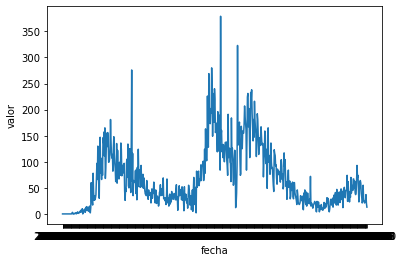

In [70]:
sns.lineplot(x="fecha", y="valor", data = data3_2)
maxs2 = data3_2["valor"].max()
print("En la region de Tarapacá, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs2 ,"personas ")

En la region de Antofagasta, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 504.0 personas 


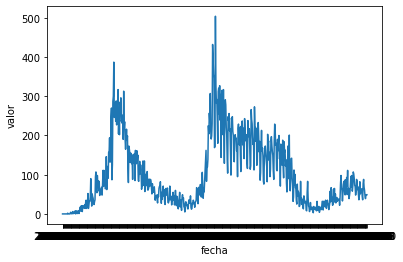

In [71]:
sns.lineplot(x="fecha", y="valor", data = data3_3)
maxs3 = data3_3["valor"].max()
print("En la region de Antofagasta, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs3 ,"personas ")

En la region de Atacama, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 304.0 personas 


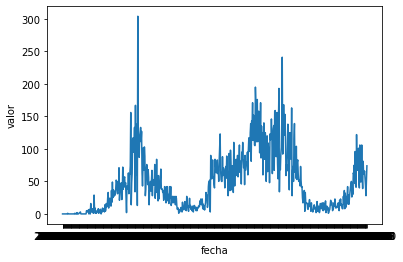

In [72]:
sns.lineplot(x="fecha", y="valor", data = data3_4)
maxs4 = data3_4["valor"].max()
print("En la region de Atacama, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs4 ,"personas ")

En la region de Coquimbo, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 358.0 personas 


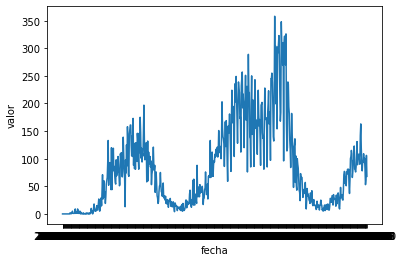

In [73]:
sns.lineplot(x="fecha", y="valor", data = data3_5)
maxs5 = data3_5["valor"].max()
print("En la region de Coquimbo, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs5 ,"personas ")

En la region de Valparaiso, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 959.0 personas 


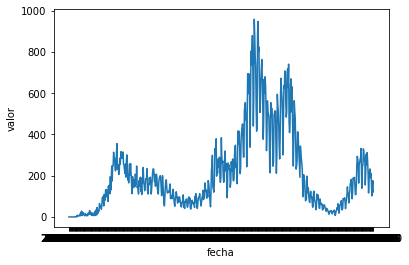

In [75]:
sns.lineplot(x="fecha", y="valor", data = data3_6)
maxs6 = data3_6["valor"].max()
print("En la region de Valparaiso, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs6 ,"personas ")

En la region de Metropolitana, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 5647.0 personas 


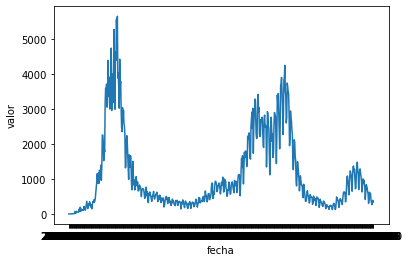

In [76]:
sns.lineplot(x="fecha", y="valor", data = data3_7)
maxs7 = data3_7["valor"].max()
print("En la region de Metropolitana, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs7 ,"personas ")

En la region de O’Higgins, el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 502.0 personas 


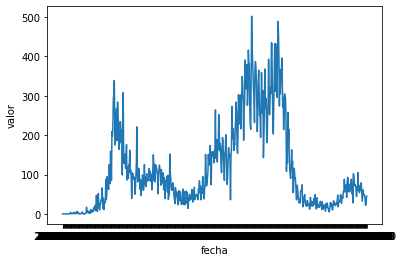

In [77]:
sns.lineplot(x="fecha", y="valor", data = data3_8)
maxs8 = data3_8["valor"].max()
print("En la region de O’Higgins, el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs8 ,"personas ")

En la region de Maule', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 789.0 personas 


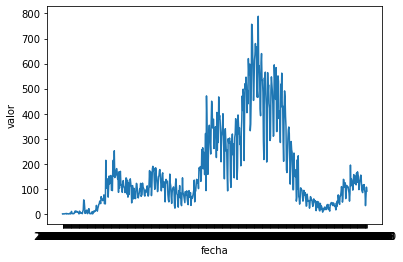

In [78]:
sns.lineplot(x="fecha", y="valor", data = data3_9)
maxs9 = data3_9["valor"].max()
print("En la region de Maule', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs9 ,"personas ")

En la region de Ñuble', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 234.0 personas 


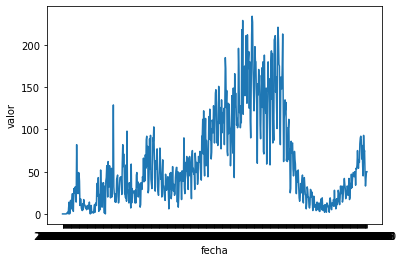

In [79]:
sns.lineplot(x="fecha", y="valor", data = data3_10)
maxs10 = data3_10["valor"].max()
print("En la region de Ñuble', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs10 ,"personas ")

En la region de Biobío', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 1014.0 personas 


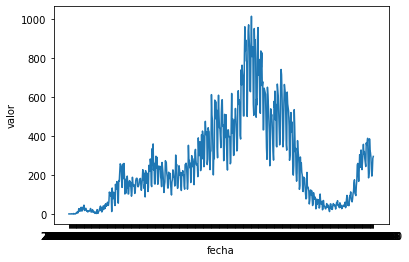

In [80]:
sns.lineplot(x="fecha", y="valor", data = data3_11)
maxs11 = data3_11["valor"].max()
print("En la region de Biobío', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs11 ,"personas ")

En la region de Araucanía', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 685.0 personas 


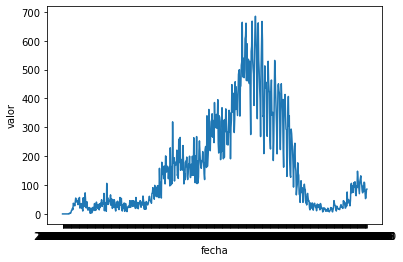

In [81]:
sns.lineplot(x="fecha", y="valor", data = data3_12)
maxs12 = data3_12["valor"].max()
print("En la region de Araucanía', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs12 ,"personas ")

En la region de Los Ríos', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 411.0 personas 


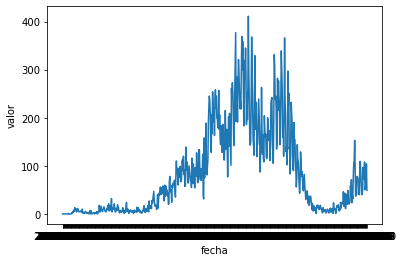

In [82]:
sns.lineplot(x="fecha", y="valor", data = data3_13)
maxs13 = data3_13["valor"].max()
print("En la region de Los Ríos', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs13 ,"personas ")

En la region de Los Lagos', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 818.0 personas 


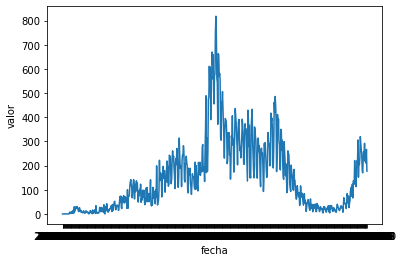

In [83]:
sns.lineplot(x="fecha", y="valor", data = data3_14)
maxs14 = data3_14["valor"].max()
print("En la region de Los Lagos', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs14 ,"personas ")

En la region de Aysén', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 113.0 personas 


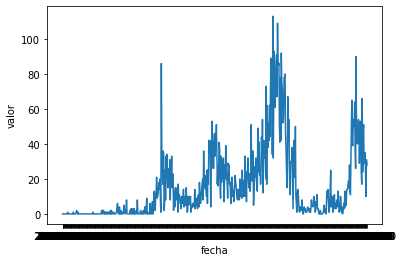

In [84]:
sns.lineplot(x="fecha", y="valor", data = data3_15)
maxs15 = data3_15["valor"].max()
print("En la region de Aysén', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs15 ,"personas ")

En la region de Magallanes', el dia en el que se registro la mayor cantidad de personas en cuarentena
o en la que se registro el numero más alto de contagios fue con 324.0 personas 


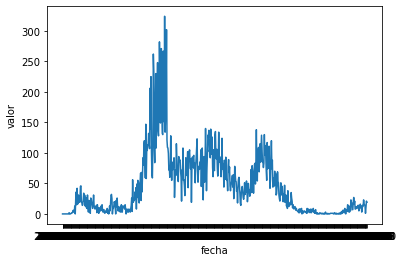

In [85]:
sns.lineplot(x="fecha", y="valor", data = data3_16)
maxs16 = data3_16["valor"].max()
print("En la region de Magallanes', el dia en el que se registro la mayor cantidad de personas en cuarentena")
print("o en la que se registro el numero más alto de contagios fue con", maxs16 ,"personas ")

In [91]:
max_X_region = pd.DataFrame({"Region": ["Arica y Parinacota","Tarapacá","Antofagasta","Atacama","Coquimbo","Valparaíso","Metropolitana","O’Higgins","Maule","Ñuble","Biobío","Araucanía","Los Ríos","Los Lagos","Aysén","Magallanes"],
                             "Maximos": [maxs, maxs2, maxs3, maxs4, maxs5, maxs6, maxs7, maxs8, maxs9, maxs10, maxs11, maxs12, maxs13, maxs14, maxs15, maxs16]})

In [92]:
max_X_region

,Region,Maximos
0,Arica y Parinacota,180.0
1,Tarapacá,379.0
2,Antofagasta,504.0
3,Atacama,304.0
4,Coquimbo,358.0
5,Valparaíso,959.0
6,Metropolitana,5647.0
7,O’Higgins,502.0
8,Maule,789.0
9,Ñuble,234.0


En la region con mayor cantidad de personas en cuarentena o la que registro el numero más alto de contagios
fue con 5647.0 personas, es decir la RM 


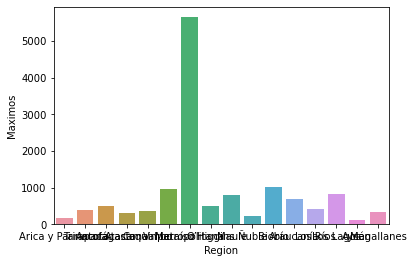

In [95]:
sns.barplot(x = "Region", y = "Maximos", data=max_X_region)
maxsM = max_X_region["Maximos"].max()
print("En la region con mayor cantidad de personas en cuarentena o la que registro el numero más alto de contagios")
print("fue con", maxsM ,"personas, es decir la RM ")